In [2]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

In [21]:
X_numpy , Y_numpy = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=1)

In [22]:
X = torch.from_numpy(X_numpy.astype(np.float32))
Y = torch.from_numpy(Y_numpy.astype(np.float32))
Y = Y.view(Y.shape[0],1)

In [23]:
print(X.shape)
n_samples, n_features = X.shape

torch.Size([100, 1])


In [24]:
input_size = n_features
output_size = 1
model = nn.Linear(input_size, output_size)

In [25]:
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(),lr=0.01)

In [26]:
epochs = 100
for epoch in range(epochs):
    y_pred = model(X)
    
    loss = criterion(y_pred, Y)
    
    loss.backward()
    
    optimizer.step()
    
    optimizer.zero_grad()
    
    if (epoch + 1) % 10 == 0:
        [w,b] = model.parameters()
        print(f"Epoch {epoch + 1}: w = {w[0][0]:.3f}, b = {b[0]:.3f}, loss = {loss:.8f}")

Epoch 10: w = 11.713, b = 1.715, loss = 4430.33886719
Epoch 20: w = 22.118, b = 2.872, loss = 3304.92724609
Epoch 30: w = 30.985, b = 3.710, loss = 2490.49682617
Epoch 40: w = 38.542, b = 4.303, loss = 1900.49340820
Epoch 50: w = 44.985, b = 4.710, loss = 1472.65527344
Epoch 60: w = 50.479, b = 4.977, loss = 1162.13049316
Epoch 70: w = 55.164, b = 5.138, loss = 936.56414795
Epoch 80: w = 59.160, b = 5.221, loss = 772.58563232
Epoch 90: w = 62.569, b = 5.248, loss = 653.29522705
Epoch 100: w = 65.478, b = 5.235, loss = 566.45837402


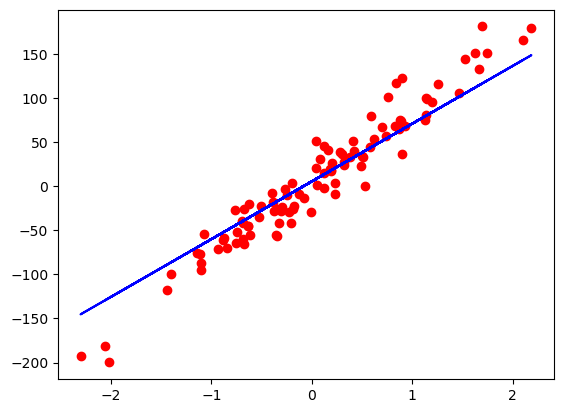

In [38]:
predicted = model(X).detach().numpy()
plt.plot(X_numpy, Y_numpy, 'ro')
plt.plot(X_numpy, predicted, 'b')
plt.show()